In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import keras as ks
import pandas as pd
import torch
import seaborn as sns

To start with this project, I process topic and images i collected in following 4 steps:

1. Load and Explore the Dataset

2. feature engineering

3. Unsupervised learning

4. data preperation

# Sword detection
-- a try on grouping sword in The Metropolitan Museum and The British Museum --

In this project, i collect some images of sword, trying to find a machine learning perspective on grouping sword in different regions. 



## STEP 1: Load and Explore the Dataset

The images of sword form in different shape and ways, thus i split them to 6 group, representing different positioning of sword head pointing.

In [2]:
import sklearn.datasets as datasets
import os
import tensorflow as tf

org_path = "sword/left"
image_l_tensor = []
for img_name in os.listdir(org_path):
    img_path = os.path.join(org_path, img_name)
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')): 
        image = tf.io.read_file(img_path)
        image = tf.image.decode_image(image, channels=3)
        image_l_tensor.append(image)
#image_l_tensor = tf.stack(image_l_tensor)


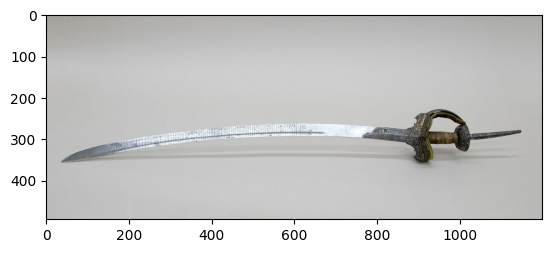

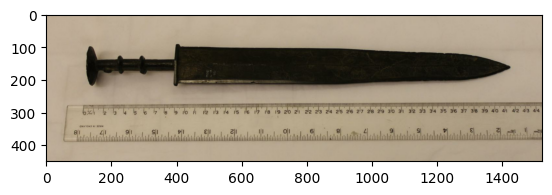

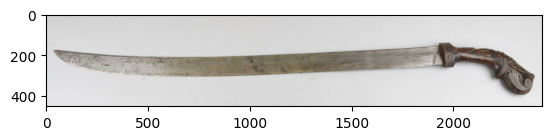

In [3]:
for x in range(3):
    random_index = np.random.choice(len(image_l_tensor))
    plt.imshow(image_l_tensor[random_index])
    plt.show()

Different placement make the dataset a mess

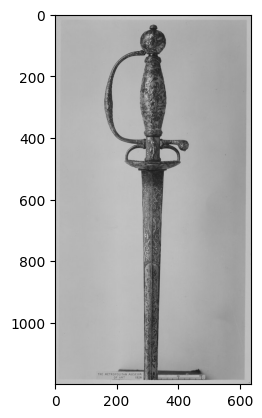

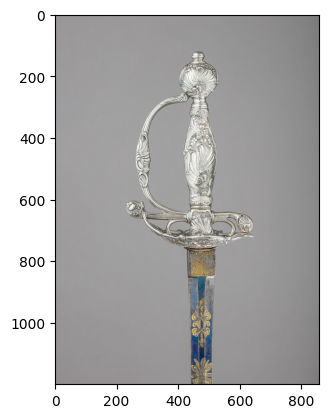

In [4]:
org_path = "sword/partial"
image_p_tensor = []
for img_name in os.listdir(org_path):
    img_path = os.path.join(org_path, img_name)
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')): 
        image = tf.io.read_file(img_path)
        image = tf.image.decode_image(image, channels=3)
        image_p_tensor.append(image)
for x in range(2):
    random_index = np.random.choice(len(image_p_tensor))
    plt.imshow(image_p_tensor[random_index])
    plt.show()

Image does not have same shape and background, thus need some preprocessing

In [18]:
image_l_tensor 

[<tf.Tensor: shape=(450, 1665, 3), dtype=uint8, numpy=
 array([[[161, 165, 166],
         [161, 165, 166],
         [161, 165, 166],
         ...,
         [176, 176, 176],
         [176, 176, 176],
         [177, 177, 177]],
 
        [[162, 166, 167],
         [162, 166, 167],
         [162, 166, 167],
         ...,
         [176, 176, 176],
         [176, 176, 176],
         [176, 176, 176]],
 
        [[162, 166, 167],
         [162, 166, 167],
         [162, 166, 167],
         ...,
         [176, 176, 176],
         [176, 176, 176],
         [176, 176, 176]],
 
        ...,
 
        [[168, 172, 173],
         [168, 172, 173],
         [168, 172, 173],
         ...,
         [172, 172, 172],
         [171, 171, 171],
         [173, 173, 173]],
 
        [[167, 171, 172],
         [167, 171, 172],
         [167, 171, 172],
         ...,
         [173, 173, 173],
         [173, 173, 173],
         [172, 172, 170]],
 
        [[167, 171, 172],
         [167, 171, 172],
         [167

## STEP 2: feature engineering

First step of all to handle the dataset is to standardize the images. Since I already manually split sword postion, i can just rotate all of them to same direction

### 0. Standardize the image

In [27]:
org_path = "sword/down"
end_path = "sword/standardize"
image_l_tensor = []
for img_name in os.listdir(org_path):
    img_path = os.path.join(org_path, img_name)
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')): 
        image = tf.io.read_file(img_path)
        image = tf.image.decode_image(image, channels=3)
        rotated_image = tf.image.rot90(image, k=1)
        rotated_image = tf.image.rot90(rotated_image, k=1)
        rotated_image = tf.image.rot90(rotated_image, k=1)
        tf.image.convert_image_dtype(rotated_image, tf.uint8)
        encoded_image = tf.io.encode_jpeg(rotated_image)
        tf.io.write_file(end_path+"/"+img_name, encoded_image)
org_path = "sword/up"
for img_name in os.listdir(org_path):
    img_path = os.path.join(org_path, img_name)
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')): 
        image = tf.io.read_file(img_path)
        image = tf.image.decode_image(image, channels=3)
        rotated_image = tf.image.rot90(image, k=1)
        tf.image.convert_image_dtype(rotated_image, tf.uint8)
        encoded_image = tf.io.encode_jpeg(rotated_image)
        tf.io.write_file(end_path+"/"+img_name, encoded_image)
org_path = "sword/right"
for img_name in os.listdir(org_path):
    img_path = os.path.join(org_path, img_name)
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')): 
        image = tf.io.read_file(img_path)
        image = tf.image.decode_image(image, channels=3)
        rotated_image = tf.image.rot90(image, k=1)
        rotated_image = tf.image.rot90(rotated_image, k=1)
        tf.image.convert_image_dtype(rotated_image, tf.uint8)
        encoded_image = tf.io.encode_jpeg(rotated_image)
        tf.io.write_file(end_path+"/"+img_name, encoded_image)
org_path = "sword/left"
for img_name in os.listdir(org_path):
    img_path = os.path.join(org_path, img_name)
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')): 
        image = tf.io.read_file(img_path)
        rotated_image = tf.image.decode_image(image, channels=3)
        tf.image.convert_image_dtype(rotated_image, tf.uint8)
        encoded_image = tf.io.encode_jpeg(rotated_image)
        tf.io.write_file(end_path+"/"+img_name, encoded_image)

### 1. Explore normalization

In [ ]:
# use min max normalize to rearrange the image in [0, 1] scale
org_path = "sword/standardize"
img_x = []
for img_name in os.listdir(org_path):
    img_path = os.path.join(org_path, img_name)
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')): 
        image = tf.io.read_file(img_path)
        image = tf.image.decode_image(image, channels=3)
        image = tf.image.convert_image_dtype(image, tf.float32)
        img_x.append(image)


x = img_x
x_norm = x[0]/255.0
print(x[0])
print(x_norm[0])

tf.Tensor(
[[[0.6313726  0.64705884 0.6509804 ]
  [0.6313726  0.64705884 0.6509804 ]
  [0.6313726  0.64705884 0.6509804 ]
  ...
  [0.6901961  0.6901961  0.6901961 ]
  [0.6901961  0.6901961  0.6901961 ]
  [0.6901961  0.6901961  0.6901961 ]]

 [[0.6313726  0.64705884 0.6509804 ]
  [0.6313726  0.64705884 0.6509804 ]
  [0.6313726  0.64705884 0.6509804 ]
  ...
  [0.6901961  0.6901961  0.6901961 ]
  [0.6901961  0.6901961  0.6901961 ]
  [0.6901961  0.6901961  0.6901961 ]]

 [[0.63529414 0.6509804  0.654902  ]
  [0.63529414 0.6509804  0.654902  ]
  [0.63529414 0.6509804  0.654902  ]
  ...
  [0.6901961  0.6901961  0.6901961 ]
  [0.6901961  0.6901961  0.6901961 ]
  [0.6901961  0.6901961  0.6901961 ]]

 ...

 [[0.65882355 0.6745098  0.6784314 ]
  [0.65882355 0.6745098  0.6784314 ]
  [0.65882355 0.6745098  0.6784314 ]
  ...
  [0.6745098  0.6745098  0.6745098 ]
  [0.6666667  0.6666667  0.6666667 ]
  [0.6784314  0.6784314  0.6784314 ]]

 [[0.654902   0.67058825 0.6745098 ]
  [0.654902   0.67058825 0

### 2. Resizing
Resizing the image is essential for following operation

Since images are not same, i use the point of sword as feature to resize and avoid distorting the sword shape

(256, 256, 3)


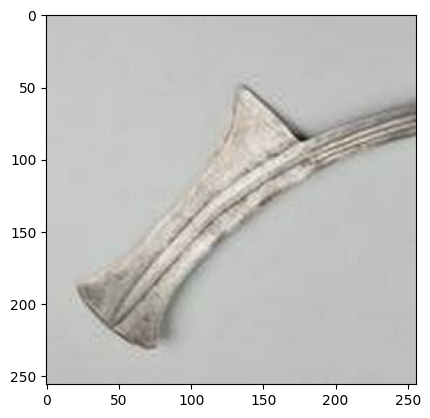

(256, 256, 3)


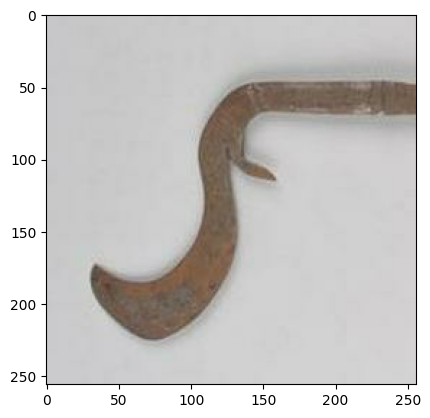

(256, 256, 3)


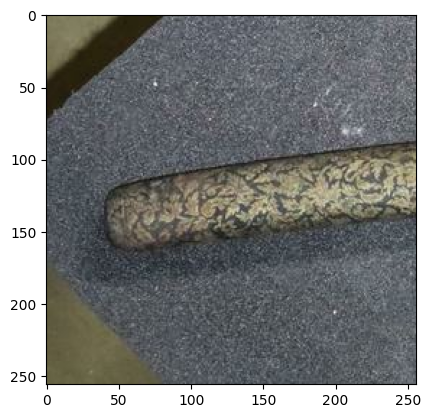

In [99]:
org_path = "sword/standardize"
end_path = "sword/resize"
from PIL import Image
image = Image.open("/Users/hongchongyuan/Desktop/DSAN_spring_2025/DSAN6500/mini-project-1-team-4/sword/right/24324.jpg")
plt.imshow(image)
target_size = 256
corp_f = 1
for img_name in os.listdir(org_path):
    img_path = os.path.join(org_path, img_name)
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')): 
        image = Image.open(img_path)
        w, h = image.size
        if w > h:
            new_w = int(w * (target_size / h))
            new_h = target_size
        else:
            new_w = target_size
            new_h = int(h * (target_size / w))
        image = image.resize((new_w, new_h), Image.LANCZOS)
        focus_x, focus_y = 30, 200 #focus in 30, 200, which is best possible focus which catch the sword feature and not distort #500, 200,
        corp_size = int(target_size*corp_f)
        left = max(0, min(new_w - corp_size, focus_x - corp_size // 2))
        top = max(0, min(new_h - corp_size, focus_y - corp_size // 2))
        right = left + target_size
        bottom = top + target_size
        image = image.crop((left, top, right, bottom))

        save_path = os.path.join(end_path, img_name)
        image.save(save_path, format="JPEG")
        # image.thumbnail((128, 128), Image.LANCZOS)
        # save_path = os.path.join(end_path, img_name)
        # image.save(save_path, format="JPEG")


img_x = []
for img_name in os.listdir(end_path):
    img_path = os.path.join(end_path, img_name)
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')): 
        image = tf.io.read_file(img_path)
        image = tf.image.decode_image(image, channels=3)
        img_x.append(image)
for x in range(3):
    random_index = np.random.choice(len(img_x))
    plt.imshow(img_x[random_index].numpy())
    print(img_x[random_index].numpy().shape)
    plt.show()

### 3. Histogram Equalization

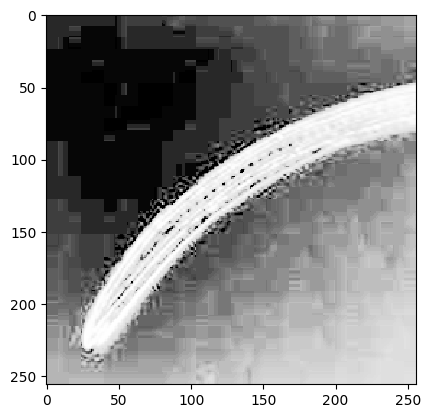

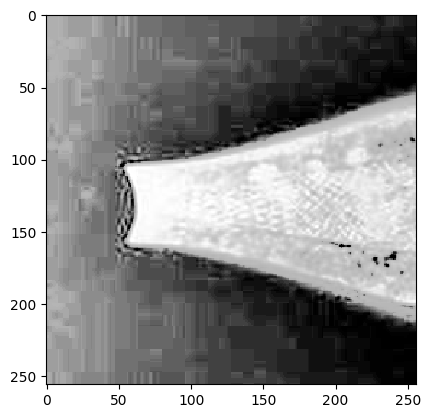

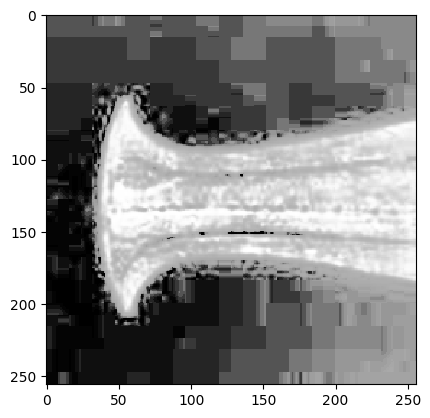

In [107]:
import cv2

img_x
for x in range(3):
    random_index = np.random.choice(len(img_x))
    #print("target: ", img_x[random_index])
    img_gray = cv2.cvtColor(img_x[random_index].numpy(), cv2.COLOR_RGB2GRAY)
    img = cv2.equalizeHist(img_gray)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


Histogram equalization improve contrast to image by redistribute the pixel intensity evenly. 

### 4. Edge detection

(256, 256, 3)


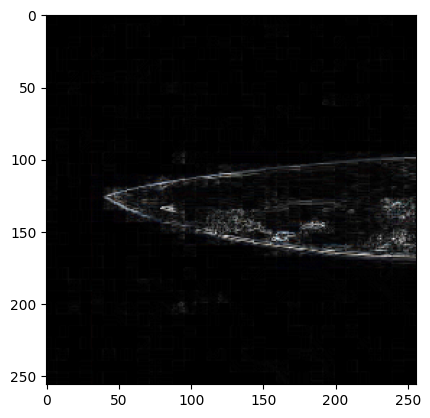

(256, 256, 3)


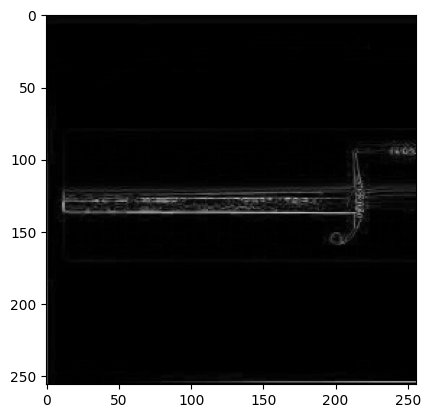

(256, 256, 3)


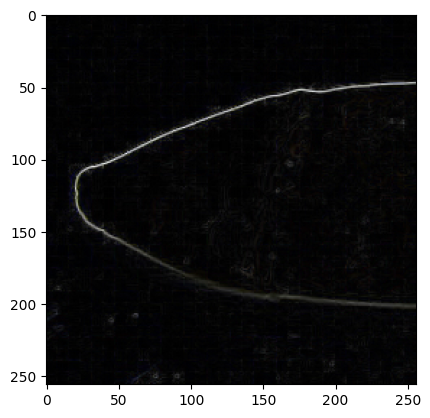

In [172]:

def gradient_edge_detection(img):
        print(img.shape)
        H, W, C = img.shape
        g_x = torch.zeros((C, H, W))
        g_y = torch.zeros((C, H, W))
        img = torch.tensor(img.numpy(), dtype=torch.float32)
        if img.ndim == 3:  
            img = img.permute(2, 0, 1)
        elif img.ndim == 2: 
            img = img.unsqueeze(0)
        g_x[:, :, :-1] = torch.diff(img, dim=2)
        g_y[:, :-1, :] = torch.diff(img, dim=1)
        gradient_magnitude = torch.sqrt(g_x**2 + g_y**2)
        gradient_magnitude -= gradient_magnitude.min()
        gradient_magnitude /= gradient_magnitude.max()
        plt.imshow(gradient_magnitude.permute(1, 2, 0).numpy(), cmap="gray")
        #print(gradient_magnitude.shape)
        plt.show()
for x in range(3):
    random_index = np.random.choice(len(img_x))
    #print("target: ", img_x[random_index])
    img = img_x[random_index]
    #print(img.ndim)
    gradient_edge_detection(img)

Edge detection provide a great representation of image, allowing machine focusing on solely shapes of sword point. Thus we would use edge detection image as dataset to further unsupervised learning. (color seems unimportant, ancient sword without good preservation appear same in color)

In [175]:
org_path = "sword/resize"
end_path = "sword/grayscale"
from PIL import Image
for img_name in os.listdir(org_path):
    img_path = os.path.join(org_path, img_name)
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')): 
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        save_path = os.path.join(end_path, img_name)
        cv2.imwrite(save_path, image)

In [186]:
def gradient_edge_detection_save(img, path, name):
        #print(img.shape)
        H, W, C = img.shape
        g_x = torch.zeros((C, H, W))
        g_y = torch.zeros((C, H, W))
        img = torch.tensor(img.numpy(), dtype=torch.float32)
        if img.ndim == 3:  
            img = img.permute(2, 0, 1)
        elif img.ndim == 2: 
            img = img.unsqueeze(0)
        g_x[:, :, :-1] = torch.diff(img, dim=2)
        g_y[:, :-1, :] = torch.diff(img, dim=1)
        gradient_magnitude = torch.sqrt(g_x**2 + g_y**2)
        gradient_magnitude -= gradient_magnitude.min()
        gradient_magnitude /= gradient_magnitude.max()
        img_edge = gradient_magnitude.permute(1, 2, 0).numpy()
        img_edge = (img_edge * 255).astype("uint8")
        save_file = os.path.join(path, name)
        edge_image = Image.fromarray(img_edge)
        edge_image.save(save_file, format="JPEG")
        
org_path = "sword/resize"
end_path = "sword/edge"
from PIL import Image
for img_name in os.listdir(org_path):
    img_path = os.path.join(org_path, img_name)
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')): 
        image = tf.io.read_file(img_path)
        image = tf.image.decode_image(image, channels=3)
        gradient_edge_detection_save(image, end_path, img_name)
        

## STEP 3: Unsupervised Learning

### Clustering algorithms: k-means, hierarchical clustering, DBSCAN

In [3]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [4]:
img_x = []
end_path = "sword/edge"
for img_name in os.listdir(end_path):
    img_path = os.path.join(end_path, img_name)
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')): 
        image = tf.io.read_file(img_path)
        image = tf.image.decode_image(image, channels=3)
        img_x.append(image)
img_x = np.array(img_x)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


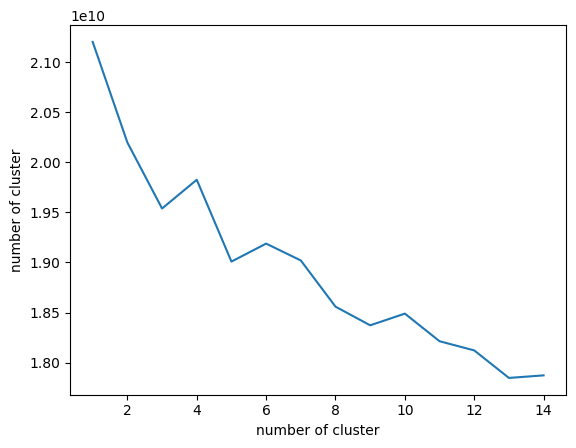

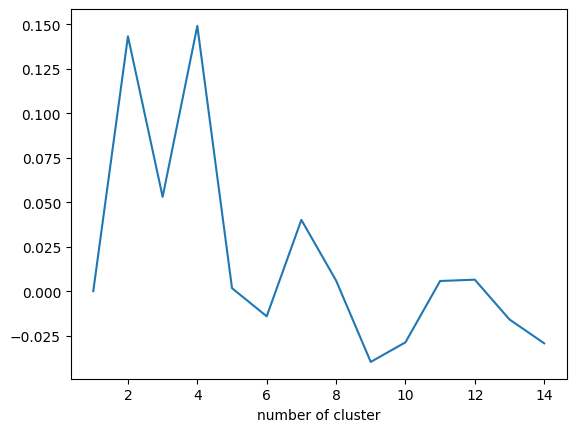

In [15]:
#k-means (base on pixel centriod)
ls_score = []
ls = []
x = img_x.reshape(img_x.shape[0], -1)
for i in range(1,15):
    print(i)
    kmeans=KMeans(n_clusters=i, init='k-means++')
    cb = kmeans.fit_predict(x)
    #kmeans.fit(df_y)
    #print(cb)
    if len(set(cb)) > 1: 
        score = silhouette_score(x, cb)
        #print(score)
        ls_score.append(score)
    else:ls_score.append(0)
    ls.append(kmeans.inertia_)

plt.plot(range(1,15), ls)
plt.xlabel("number of cluster")
plt.ylabel("number of cluster")
plt.show()
plt.plot(range(1,15), ls_score)
plt.xlabel("number of cluster")
plt.show()


k-means predicted target:  1


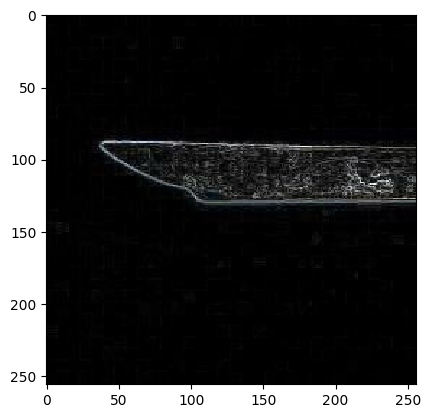

k-means predicted target:  0


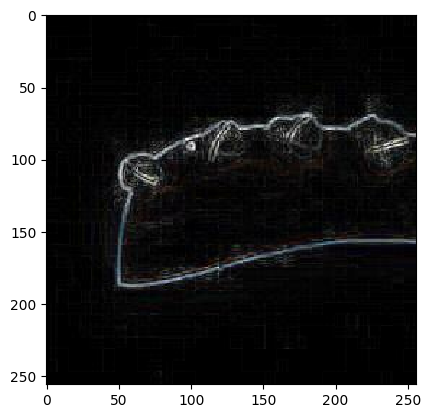

k-means predicted target:  1


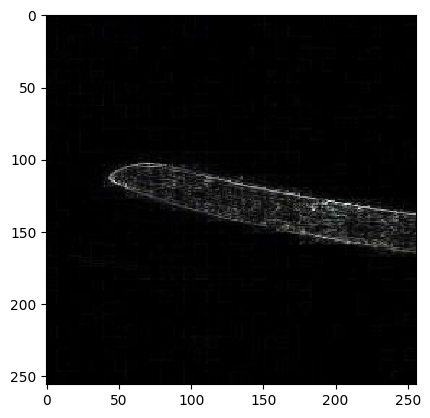

k-means predicted target:  1


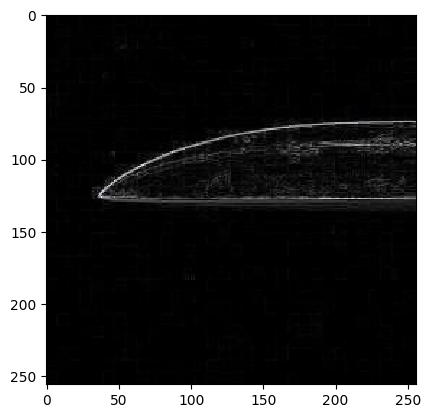

k-means predicted target:  1


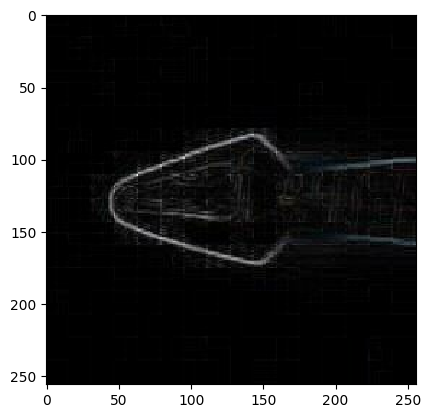

k-means predicted target:  1


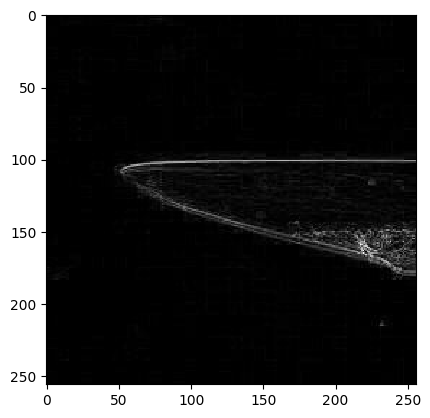

k-means predicted target:  3


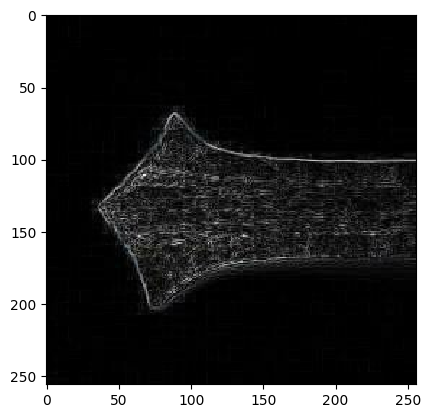

k-means predicted target:  1


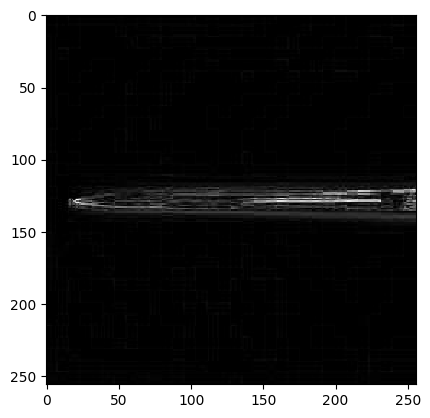

k-means predicted target:  1


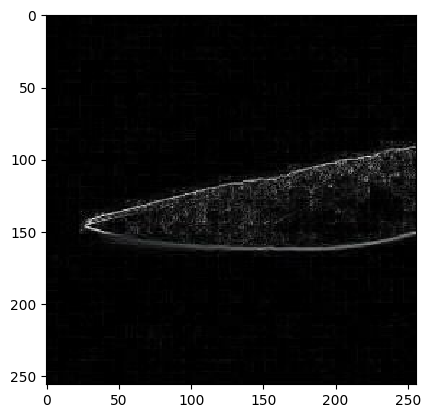

k-means predicted target:  1


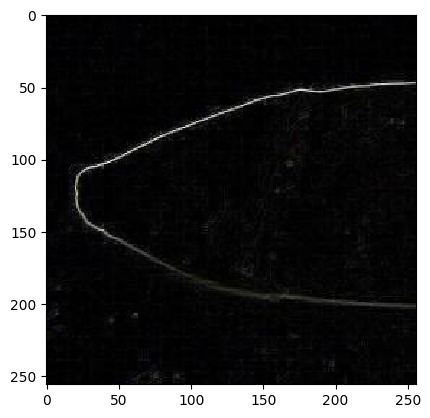

In [16]:
#k-mean optimal
#Through inertia and silhouette-score, we can see cluster of 4 is best
kmeans=KMeans(n_clusters=4, init='k-means++')
cb = kmeans.fit_predict(x)
random_index = -1
for k in range(10):
    random_index += 1   
    #print("target: ", x[random_index])
    print("k-means predicted target: ", cb[random_index])
    plt.imshow(img_x[random_index], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

### Dimensionality Reduction

(330, 196608)


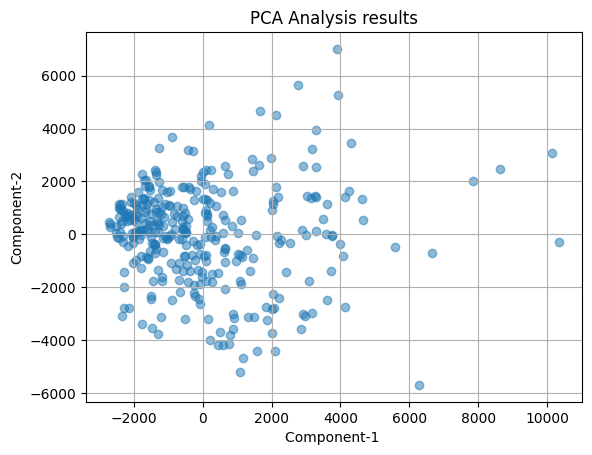

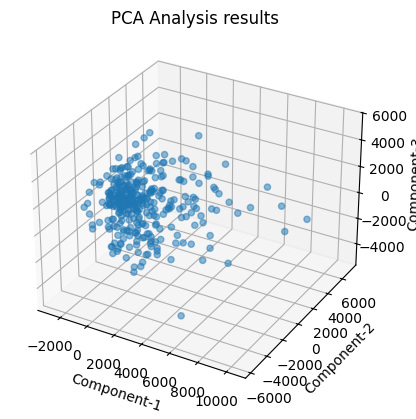

In [32]:
#PCA
from sklearn.decomposition import PCA
x = img_x
x = img_x.reshape(img_x.shape[0], -1)
print(x.shape)
#df_y = digits.target
def plot_2D(X,color_vector, method):
    fig, ax = plt.subplots()
    scatter = ax.scatter(X[:,0], X[:,1], alpha=0.5) #, c=y
    ax.set(xlabel='Component-1 ', ylabel='Component-2',
    title=f'{method} Analysis results')
    ax.grid()
    # legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
    #                               markerfacecolor=scatter.cmap(scatter.norm(label)),
    #                               markersize=8, label=str(label)) for label in np.unique(color_vector)]
    #ax.legend(handles=legend_elements)
    plt.show()
def plot_3D(X, color_vector, method):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.5)
    ax.set(xlabel='Component-1', ylabel='Component-2', zlabel='Component-3',
           title= f'{method} Analysis results')
    # legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
    #                               markerfacecolor=scatter.cmap(scatter.norm(label)),
    #                               markersize=8, label=str(label)) for label in np.unique(color_vector)]
    # ax.legend(handles=legend_elements)
    plt.show()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
plot_2D(X_pca,[], "PCA")
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x)
plot_3D(X_pca,[], "PCA")

k-mean seems have most meaningful clustering, we can have a look in pca

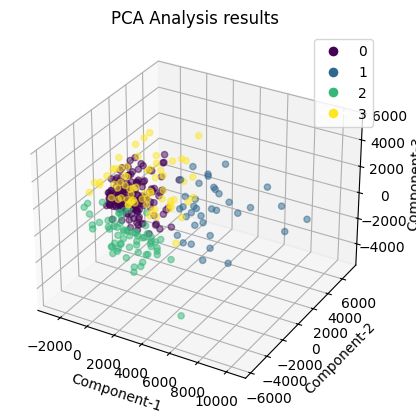

In [37]:
#
kmeans=KMeans(n_clusters=4, init='k-means++')
cb = kmeans.fit_predict(x)
X_pca = pca.fit_transform(x)
def plot_3D(X, color_vector, method):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2],c = color_vector, alpha=0.5)
    ax.set(xlabel='Component-1', ylabel='Component-2', zlabel='Component-3',
           title= f'{method} Analysis results')
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                   markerfacecolor=scatter.cmap(scatter.norm(label)),
                                   markersize=8, label=str(label)) for label in np.unique(color_vector)]
    ax.legend(handles=legend_elements)
    plt.show()
plot_3D(X_pca,cb, "PCA")

## STEP 4: Dataset Preparation

In [71]:
img_name_ls = []
img_x =[]
end_path = "sword/edge"
for img_name in os.listdir(end_path):
    img_path = os.path.join(end_path, img_name)
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')): 
        img_name_ls.append(img_name)
        image = tf.io.read_file(img_path)
        image = tf.image.decode_image(image, channels=3)
        img_x.append(image)
img_x = np.array(img_x)
print(img_name_ls)
x = img_x.reshape(img_x.shape[0], -1)
kmeans=KMeans(n_clusters=4, init='k-means++')
cb = kmeans.fit_predict(x)

['preview_01442988_001.jpg', 'preview_EAF7151.jpg', 'preview_01399060_001.jpg', 'preview_01399118_001.jpg', 'preview_EAF52568.jpg', 'preview_01414730_001.jpg', 'preview_EAF52597.jpg', '24325.jpg', 'preview_00286820_001.jpg', '00346359_001.JPG', 'preview_EAF13863_F2.jpg', '24873.jpg', 'preview_01414344_001.jpg', 'preview_01515381_001.jpg', '24324.jpg', 'preview_01390985_001.jpg', '01213470_001.JPG', 'preview_00420050_001.jpg', 'preview_EAF7150.jpg', '21880.jpg', '24720.jpg', 'preview_EAF20499.jpg', 'preview_EAF51704.jpg', 'mid_01173471_001.jpg', 'preview_01425489_001.jpg', 'preview_00912182_001.jpg', '01407789_001.JPG', 'preview_01374357_001.jpg', '21909.jpg', 'preview_01356416_001.jpg', 'preview_EAF55827.jpg', 'preview_EAF61573.jpg', 'preview_EAF33553.jpg', 'preview_00564152_001.jpg', 'preview_EAF6067.jpg', '01140143_001.JPG', 'preview_01403893_001.jpg', 'preview_01436057_001.jpg', 'preview_EAF35283.jpg', 'preview_00036476_001.jpg', 'preview_01395066_001.jpg', 'preview_01374594_001.jpg

In [72]:
import shutil
from sklearn.model_selection import train_test_split
image_labels = {img_name_ls[i]: cb[i] for i in range(img_x.shape[0])}
print(image_labels)
dataset_path = "sword_dataset"
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")
for label in np.unique(cb):
    os.makedirs(os.path.join(train_path, f"class_{label}"), exist_ok=True)
    os.makedirs(os.path.join(test_path, f"class_{label}"), exist_ok=True)
img_names = list(image_labels.keys())
train_images, test_images = train_test_split(img_names, test_size=0.2, stratify=cb, random_state=42)
for img_name in train_images:
    label = image_labels[img_name]
    shutil.copy(f"sword/edge/{img_name}", f"{train_path}/class_{label}/{img_name}")
for img_name in test_images:
    label = image_labels[img_name]
    shutil.copy(f"sword/edge/{img_name}", f"{test_path}/class_{label}/{img_name}")

{'preview_01442988_001.jpg': 1, 'preview_EAF7151.jpg': 1, 'preview_01399060_001.jpg': 3, 'preview_01399118_001.jpg': 1, 'preview_EAF52568.jpg': 1, 'preview_01414730_001.jpg': 3, 'preview_EAF52597.jpg': 2, '24325.jpg': 3, 'preview_00286820_001.jpg': 2, '00346359_001.JPG': 3, 'preview_EAF13863_F2.jpg': 0, '24873.jpg': 3, 'preview_01414344_001.jpg': 0, 'preview_01515381_001.jpg': 3, '24324.jpg': 3, 'preview_01390985_001.jpg': 3, '01213470_001.JPG': 0, 'preview_00420050_001.jpg': 3, 'preview_EAF7150.jpg': 1, '21880.jpg': 3, '24720.jpg': 3, 'preview_EAF20499.jpg': 0, 'preview_EAF51704.jpg': 1, 'mid_01173471_001.jpg': 2, 'preview_01425489_001.jpg': 1, 'preview_00912182_001.jpg': 3, '01407789_001.JPG': 3, 'preview_01374357_001.jpg': 3, '21909.jpg': 3, 'preview_01356416_001.jpg': 2, 'preview_EAF55827.jpg': 1, 'preview_EAF61573.jpg': 1, 'preview_EAF33553.jpg': 1, 'preview_00564152_001.jpg': 3, 'preview_EAF6067.jpg': 1, '01140143_001.JPG': 3, 'preview_01403893_001.jpg': 3, 'preview_01436057_001.

With k-mean clustering label, we store clustered data in training and testing set with 4 class evenly distribute

In [73]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
transform = transforms.Compose([
    transforms.ToTensor(),
])
train_dataset = datasets.ImageFolder(root="sword_dataset/train", transform=transform)
test_dataset = datasets.ImageFolder(root="sword_dataset/test", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
class_names = train_dataset.classes 
print(f"Classes: {class_names}")
print(train_dataset)
print(test_dataset)

Classes: ['class_0', 'class_1', 'class_2', 'class_3']
Dataset ImageFolder
    Number of datapoints: 264
    Root location: sword_dataset/train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 66
    Root location: sword_dataset/test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


3


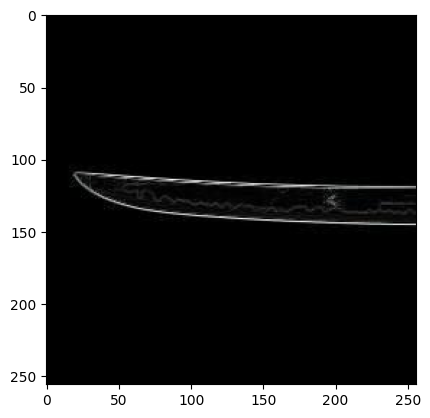

1


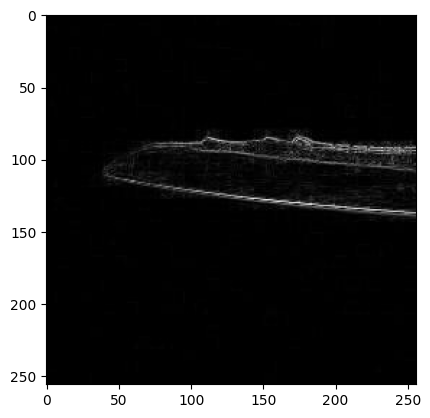

1


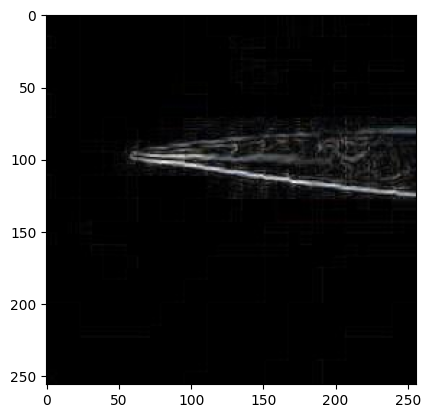

In [91]:
images, labels = next(iter(train_loader))
for k in range(3): 
    image = images[k].numpy().transpose(1, 2, 0) 
    plt.imshow(image)
    print(labels[k].item())
    plt.show()


# Music detection
-- a train on grouping music from Musical Instrunment's Sound Dataset --

In this project music part, I use the sound dataset found at kaggle. aim to use part of sound in dataset from single instrument to make clustering.

https://www.kaggle.com/datasets/soumendraprasad/musical-instruments-sound-dataset?resource=download


## STEP 1: Load and Explore the Dataset

The size of dataset sound of instruments is super huge and take years to load for each operation, thus I decide to only take look on piano sound

In [ ]:
df_ls = pd.read_csv("music/archive/Metadata_Train.csv")
df_piano = df_ls[df_ls["Class"]=="Sound_Piano"]

In [ ]:
import sklearn.datasets as datasets
import os
import tensorflow as tf
from scipy.io import wavfile
from scipy.signal import spectrogram

org_path = "music/archive/Train_submission/Train_submission"
music_l_tensor = []
for  music_name in df_piano["FileName"]:
    music_path = os.path.join(org_path, music_name)
    if music_name.lower().endswith(('.wav')): 
        sr, data = wavfile.read(music_path) 
        data = data.astype("float32")  
        tensor_audio = tf.convert_to_tensor(data, dtype=tf.float32)
        music_l_tensor.append((tensor_audio,sr))



In [ ]:
import sounddevice as sd


for x in range(1):
    random_index = np.random.choice(len(music_l_tensor))
    at, sr = music_l_tensor[random_index]
    an= at.numpy()
    an = an / np.max(np.abs(an))
    sd.play(an, sr)
    sd.wait()

### spectrogram

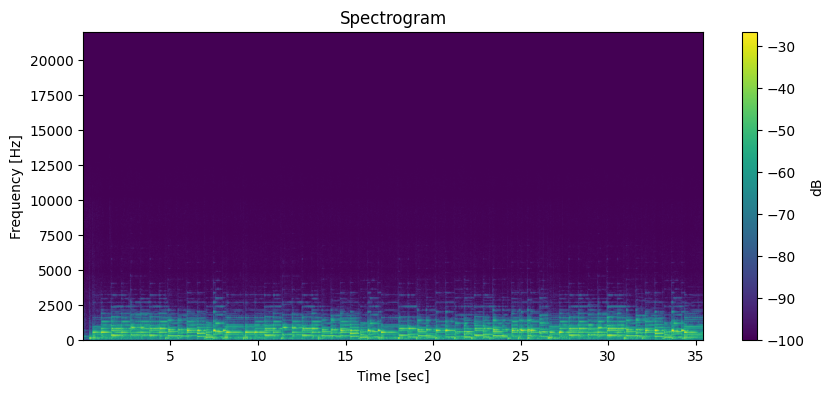

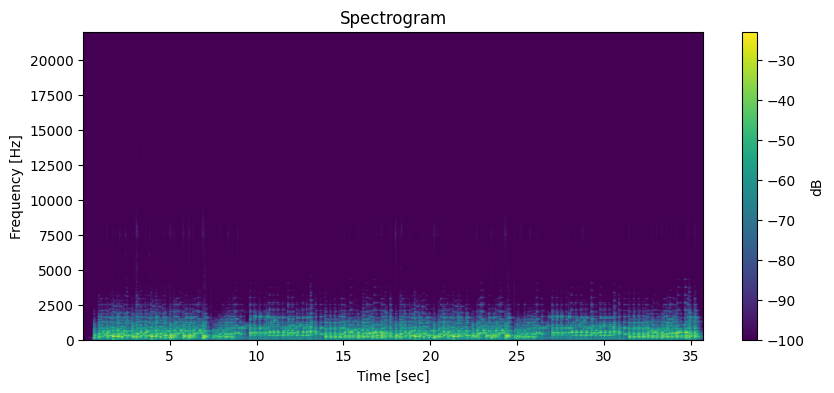

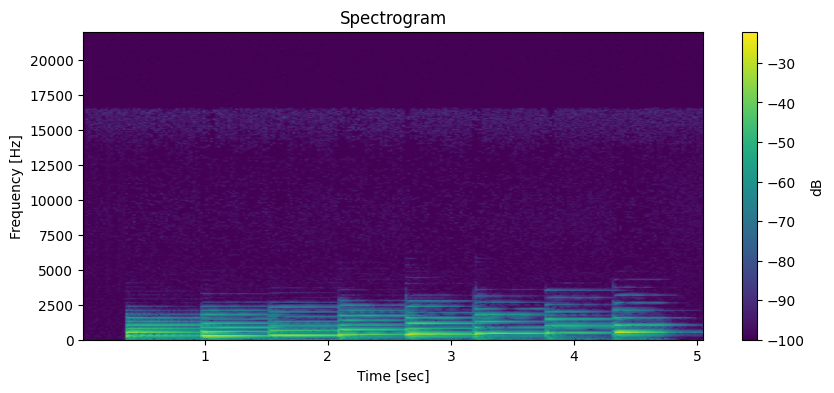

In [ ]:
from scipy.signal import spectrogram
for x in range(3):
    random_index = np.random.choice(len(music_l_tensor))
    at, sr = music_l_tensor[random_index]
    an = at.numpy()
    if an.ndim > 1:
        an = np.mean(an, axis=1) 
    an = an / np.max(np.abs(an))
    nperseg = min(1024, len(an) // 2)
    frequencies, times, Sxx = spectrogram(an, fs = sr, nperseg=nperseg)
    Sxx = 10 * np.log10(Sxx + 1e-10)
    plt.figure(figsize=(10, 4))
    plt.imshow(Sxx, aspect='auto', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title("Spectrogram")
    plt.colorbar(label='dB')
    plt.show()
    sd.play(an, sr)
    sd.wait()

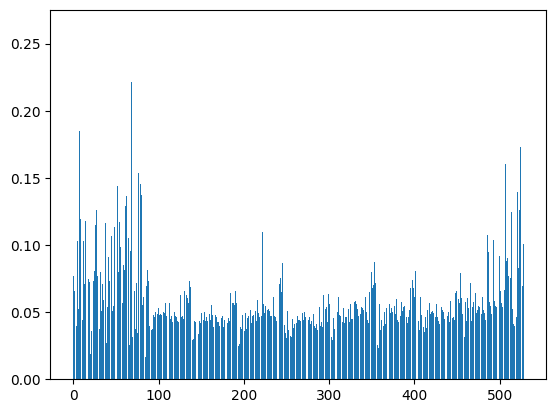

In [ ]:
# Compute Zero-Crossing Rate
zcr_ls = []
for i in music_l_tensor:
    y, sr = i
    y = y.numpy()
    if len(y.shape) > 1:
        y = y.mean(axis=1)
    zcr = np.sum(np.abs(np.diff(np.sign(y)))) / len(y)
    zcr_ls.append(zcr)
plt.bar(range(len(zcr_ls)), zcr_ls)
plt.show()

/var/folders/0q/22f144kx4dn41cw151l589xh0000gn/T/ipykernel_1687/2822869831.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10 * np.log10(Sxx), aspect='auto', origin='lower',


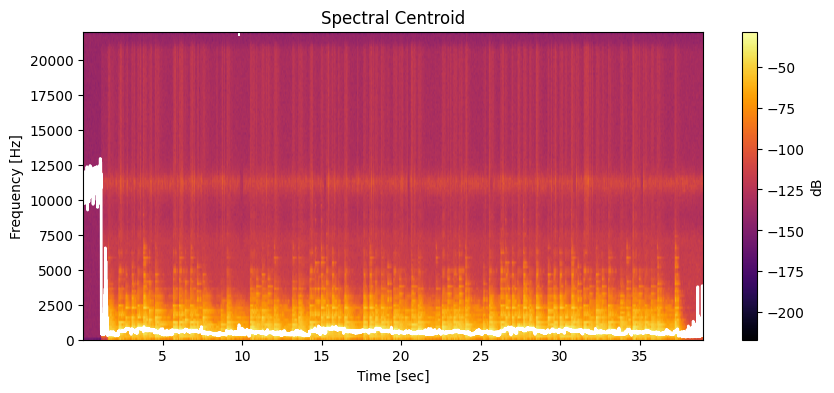

/var/folders/0q/22f144kx4dn41cw151l589xh0000gn/T/ipykernel_1687/2822869831.py:10: RuntimeWarning: invalid value encountered in divide
  centroid = np.sum(frequencies[:, None] * Sxx, axis=0) / np.sum(Sxx, axis=0)


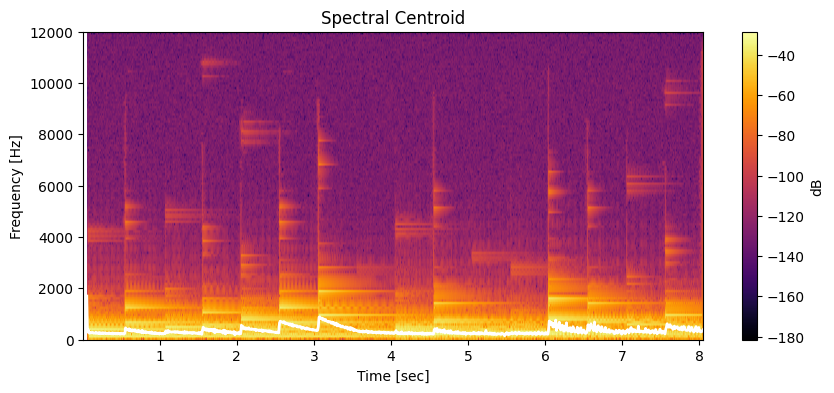

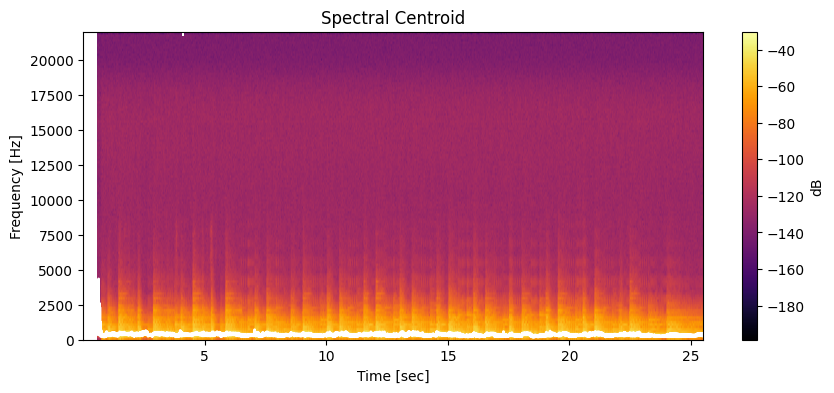

In [ ]:
# # Spectral Centroid
for x in range(3):
    random_index = np.random.choice(len(music_l_tensor))
    at, sr = music_l_tensor[random_index]
    an = at.numpy()
    if an.ndim > 1:
        an = np.mean(an, axis=1) 
    an = an / np.max(np.abs(an))
    frequencies, times, Sxx = spectrogram(an, sr)
    centroid = np.sum(frequencies[:, None] * Sxx, axis=0) / np.sum(Sxx, axis=0)
    plt.figure(figsize=(10, 4))
    plt.imshow(10 * np.log10(Sxx), aspect='auto', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()], cmap='inferno')
    plt.plot(times, centroid, color='white', linewidth=2, label="Spectral Centroid")
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title("Spectral Centroid")
    plt.colorbar(label='dB')
    plt.show()
#     sd.play(an, sr)
#     sd.wait()

## STEP 2: feature engineering

### 1. Experiment with windowing

Audio length: 1059840, nperseg: 1024, Window size: 1024


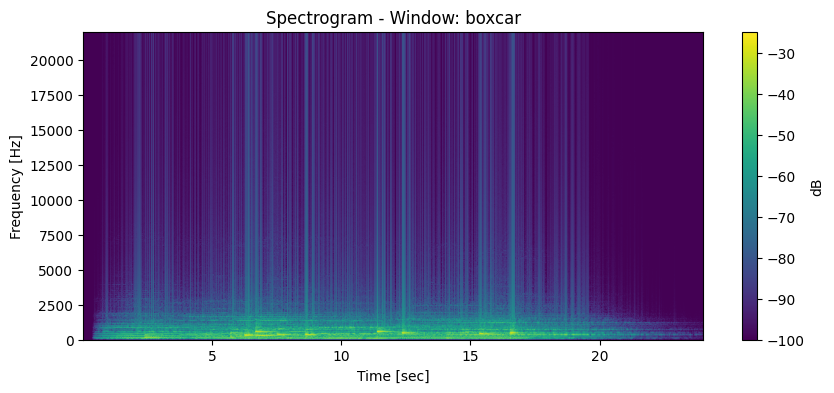

Audio length: 1059840, nperseg: 1024, Window size: 1024


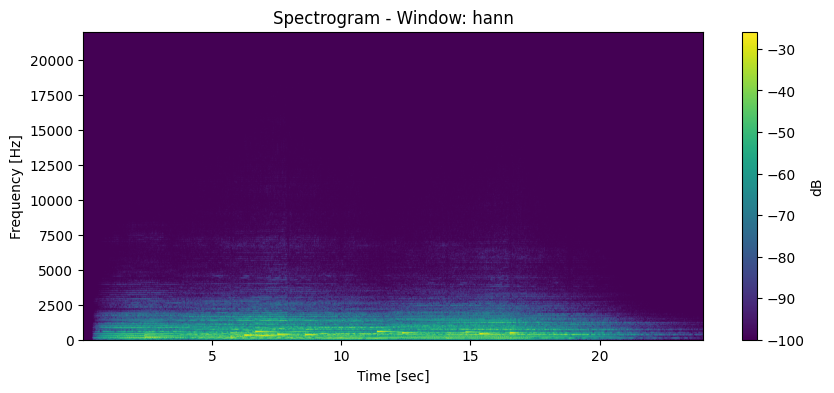

Audio length: 1059840, nperseg: 1024, Window size: 1024


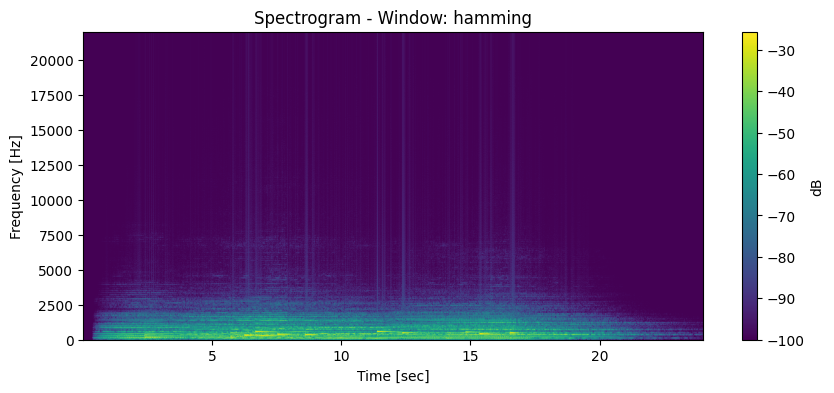

Audio length: 1059840, nperseg: 1024, Window size: 1024


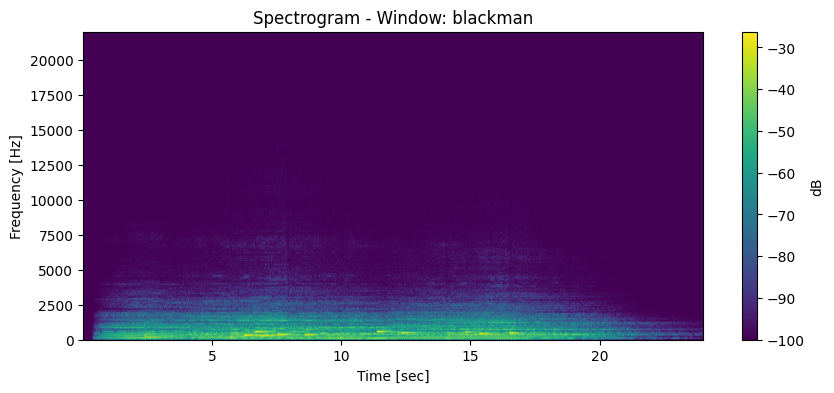

Audio length: 1059840, nperseg: 1024, Window size: 1024


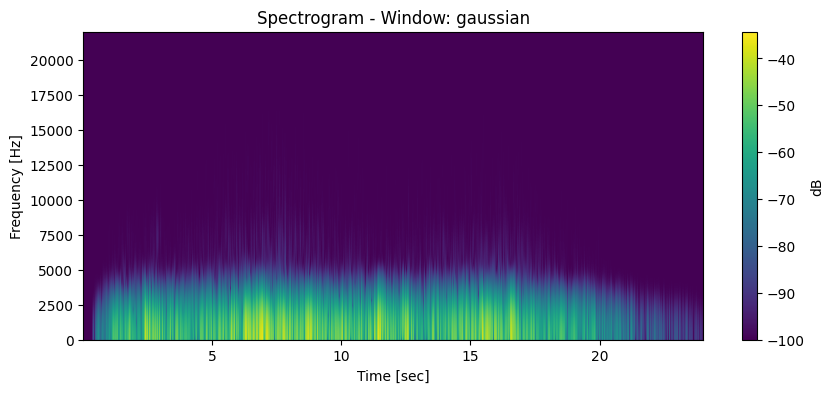

Audio length: 1059840, nperseg: 1024, Window size: 1024


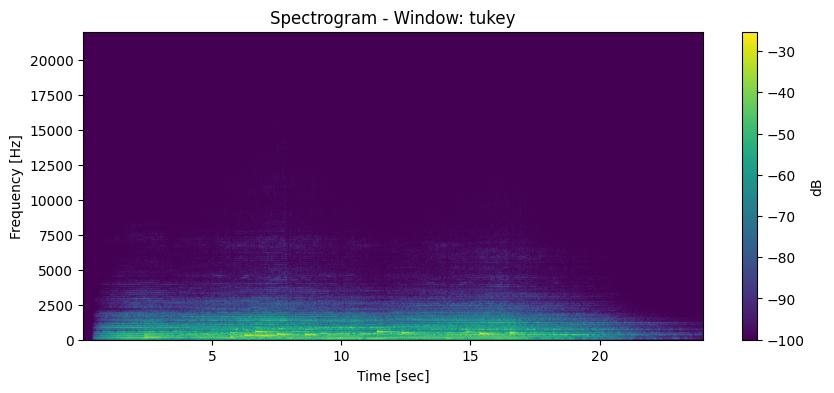

Audio length: 1350562, nperseg: 1024, Window size: 1024


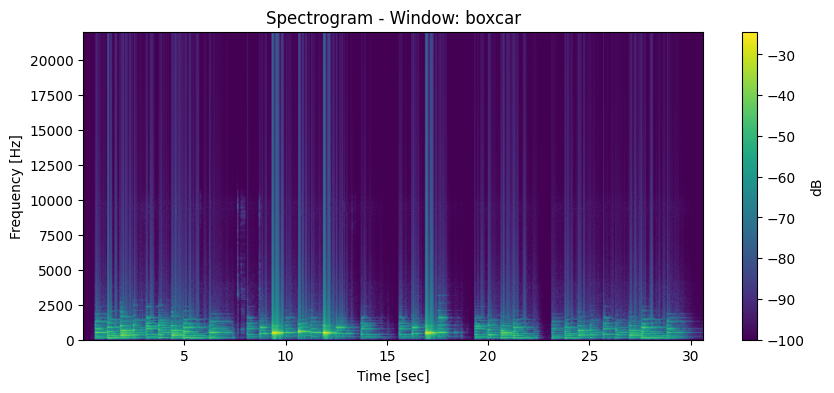

Audio length: 1350562, nperseg: 1024, Window size: 1024


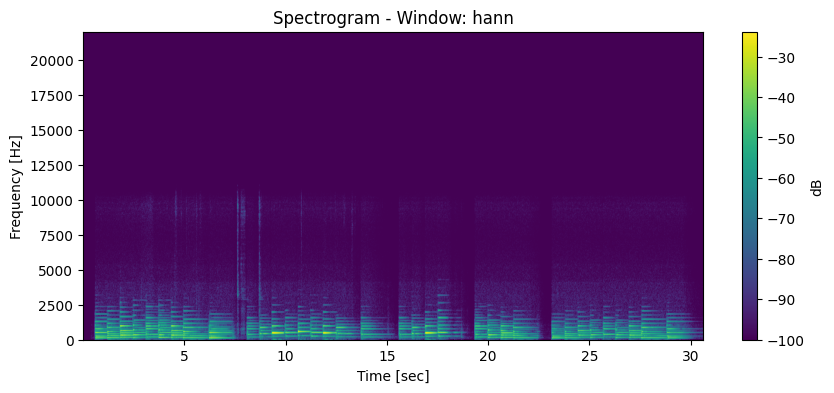

Audio length: 1350562, nperseg: 1024, Window size: 1024


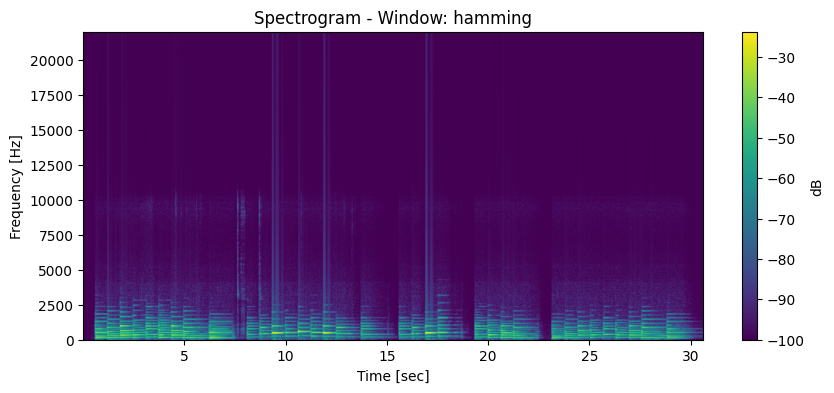

Audio length: 1350562, nperseg: 1024, Window size: 1024


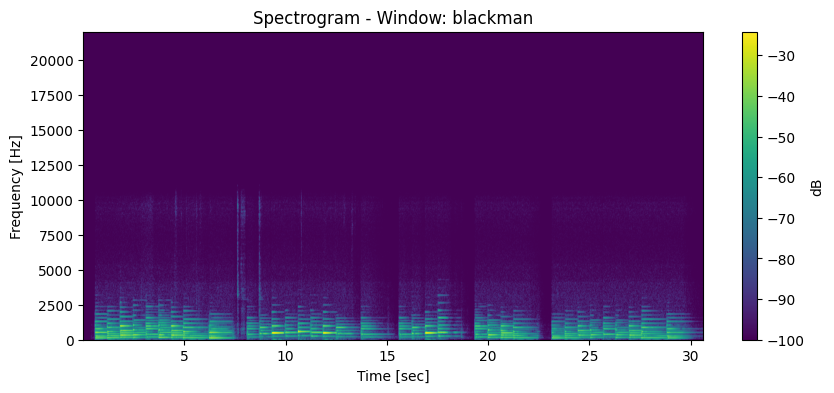

Audio length: 1350562, nperseg: 1024, Window size: 1024


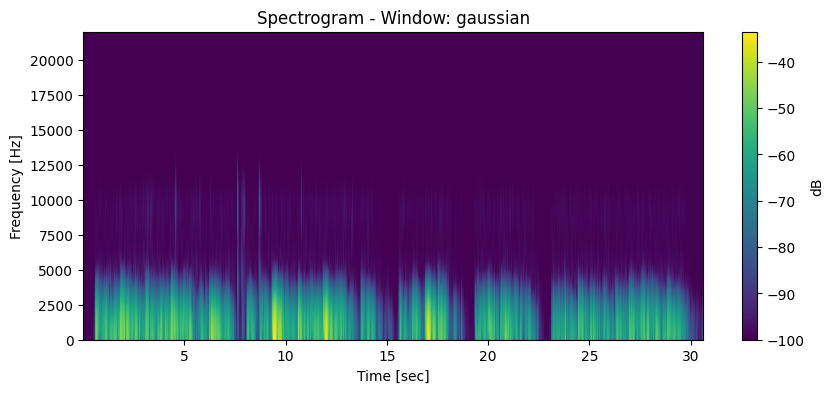

Audio length: 1350562, nperseg: 1024, Window size: 1024


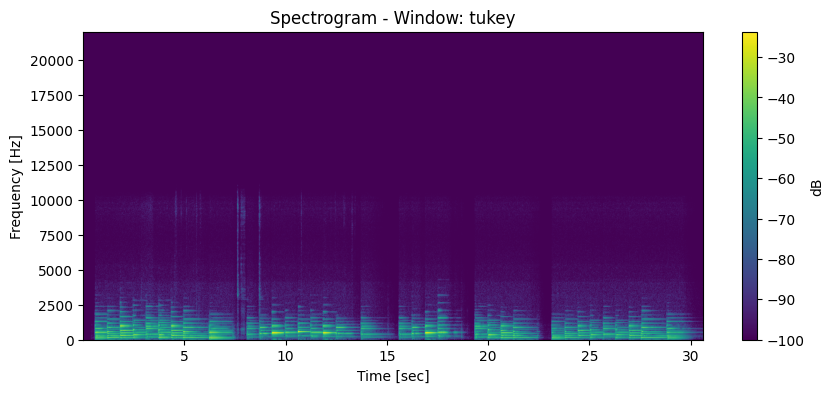

Audio length: 694575, nperseg: 1024, Window size: 1024


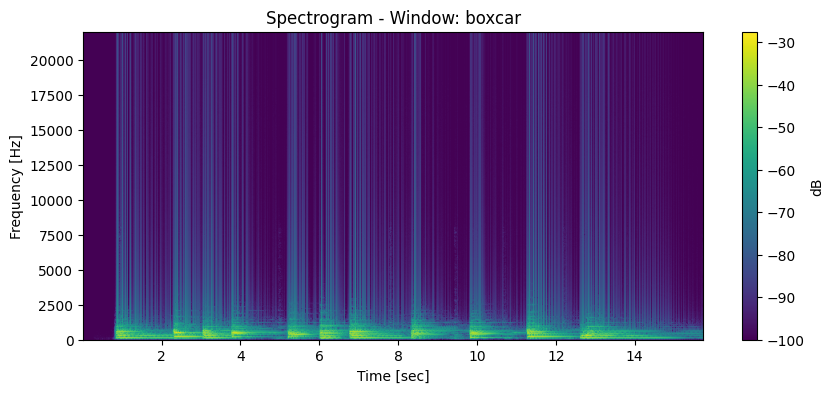

Audio length: 694575, nperseg: 1024, Window size: 1024


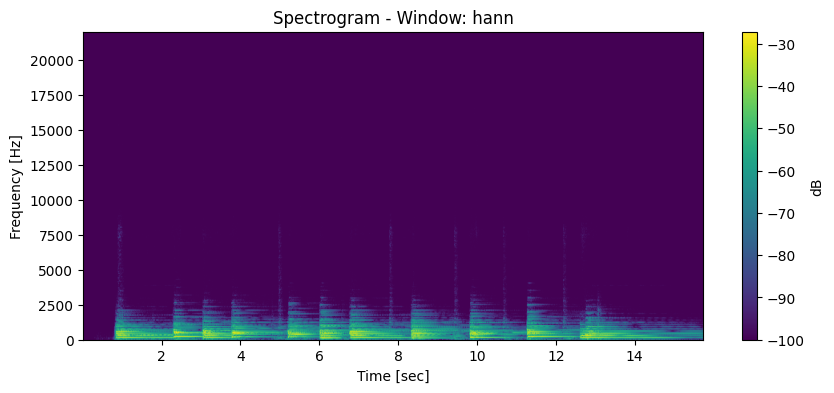

Audio length: 694575, nperseg: 1024, Window size: 1024


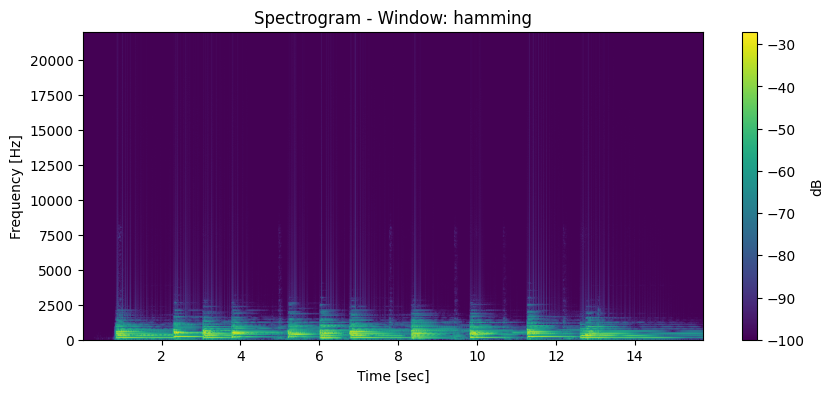

Audio length: 694575, nperseg: 1024, Window size: 1024


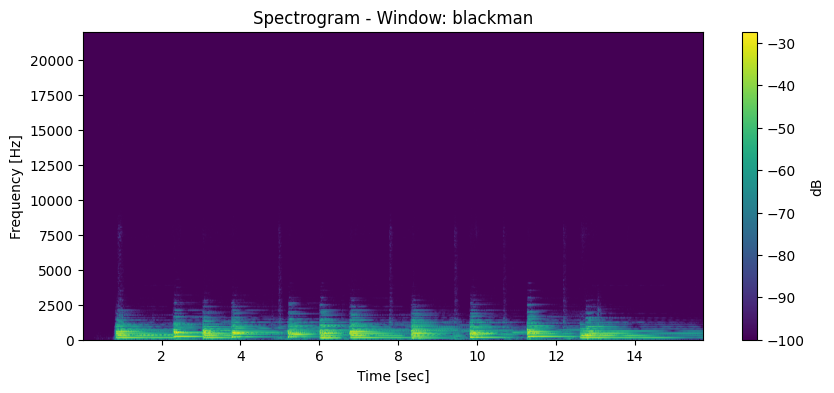

Audio length: 694575, nperseg: 1024, Window size: 1024


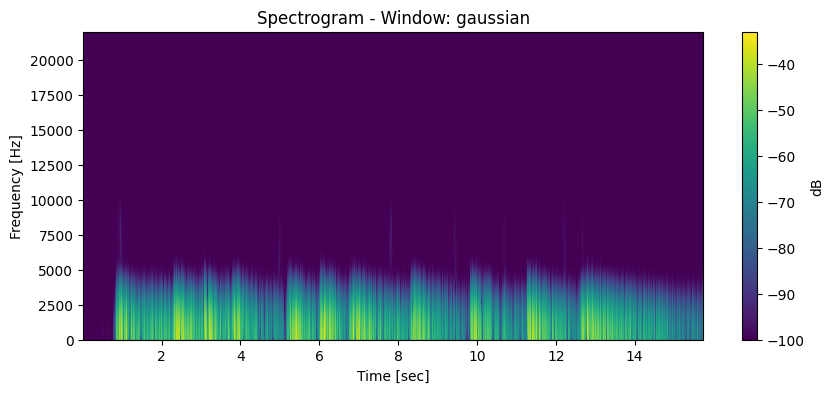

Audio length: 694575, nperseg: 1024, Window size: 1024


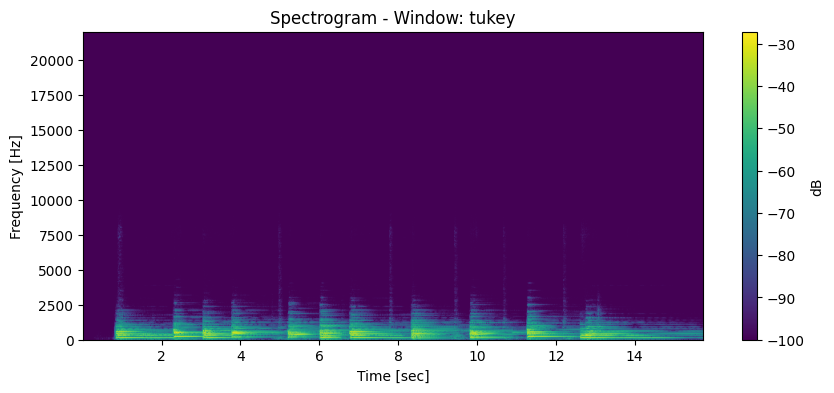

In [ ]:

from scipy.signal import get_window
for x in range(3):
    random_index = np.random.choice(len(music_l_tensor))
    at, sr = music_l_tensor[random_index]
    an = at.numpy()
    if an.ndim > 1:
        an = np.mean(an, axis=1) 
    an = an / np.max(np.abs(an))
    window_types = ["boxcar", "hann", "hamming", "blackman", "gaussian", "tukey"]
    for i, window_type in enumerate(window_types):
        nperseg = min(1024, len(an)//2)
        if len(an) < nperseg:
            nperseg = len(an)
        if window_type == "gaussian":
            window = get_window((window_type, 5), nperseg)  
        elif window_type == "tukey":
            window = get_window((window_type, 0.5), nperseg)  
        else:
            window = get_window(window_type, nperseg)
        print(f"Audio length: {len(an)}, nperseg: {nperseg}, Window size: {len(window)}")

        frequencies, times, Sxx = spectrogram(an, fs = sr, nperseg=nperseg, window=window)
        Sxx = 10 * np.log10(Sxx + 1e-10)
        plt.figure(figsize=(10, 4))
        plt.imshow(Sxx, aspect='auto', origin='lower',
            extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        st = "Spectrogram - Window: "+ window_type
        plt.title(st)
        plt.colorbar(label='dB')
        plt.show()
    # sd.play(an, sr)
    # sd.wait()

### 2. Fourier transform

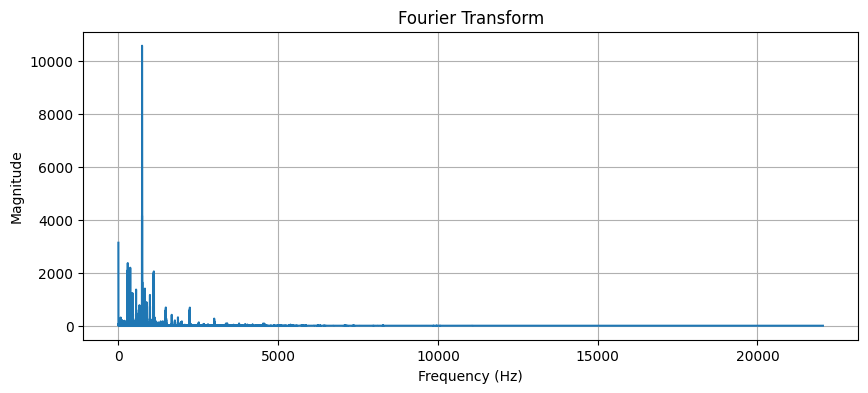

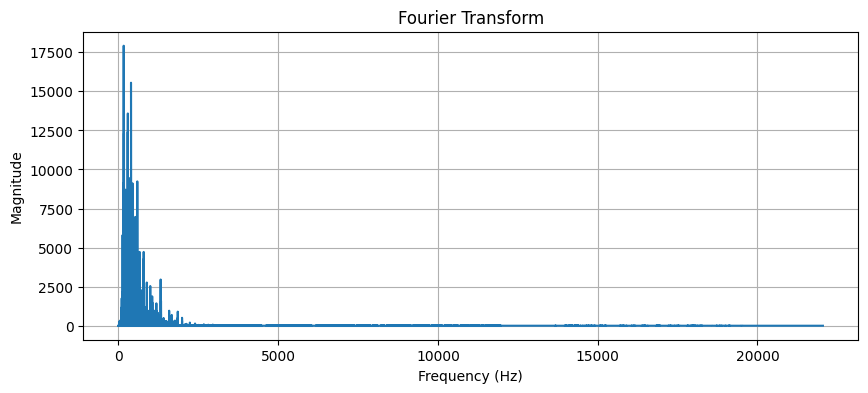

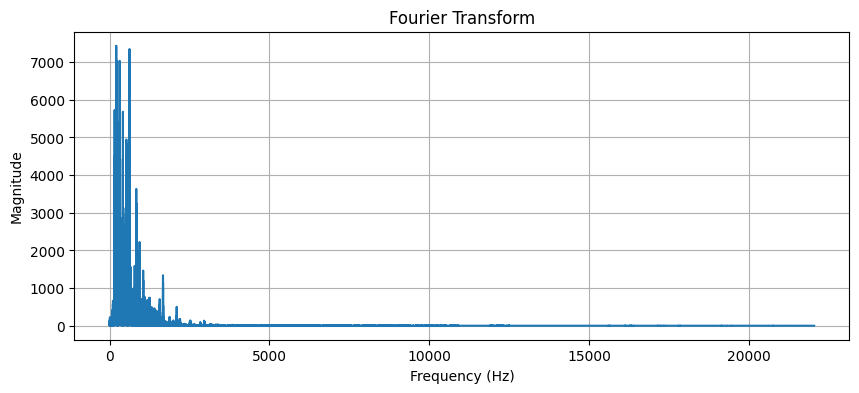

In [ ]:
from scipy.fftpack import fft, fftfreq
for x in range(3):
    random_index = np.random.choice(len(music_l_tensor))
    at, sr = music_l_tensor[random_index]
    an = at.numpy()
    if an.ndim > 1:
        an = np.mean(an, axis=1) 
    an = an / np.max(np.abs(an))
    n = len(an)
    fft_op = fft(an)
    freq = fftfreq(n, d=1/sr)
    half_n = n // 2
    fft_mag = np.abs(fft_op[:half_n]) 
    freq = freq[:half_n]

    plt.figure(figsize=(10,4))
    plt.plot(freq, fft_mag)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title("Fourier Transform")
    plt.grid()
    plt.show()

### 3. Spectrogram normalization

Since the length of each music is different, and padding would seriously damage the unsupervise spacial information. I use window to catch 10 second music as spectrogram and normalize it for further operation

In [ ]:
min_time = 1000
for x in range(len(music_l_tensor)):
    at, sr = music_l_tensor[x]
    an = at.numpy()
    
    if an.ndim > 1:
        an = np.mean(an, axis=1)  

    an = an / np.max(np.abs(an))
    nperseg = min(1024, len(an) // 2)
    frequencies, times, Sxx = spectrogram(an, fs=sr, nperseg=nperseg)

    min_time = min(min_time, Sxx.shape[1])

In [ ]:
min_time

62

In [ ]:
import cv2

norm_tf = []
sxx_ls = []
max_freq = 22050
max_time = 500
for x in range(len(music_l_tensor)):
    at, sr = music_l_tensor[x]
    an = at.numpy()
    if an.ndim > 1:
        an = np.mean(an, axis=1) 
    an = an / np.max(np.abs(an))
    nperseg = min(1024, len(an) // 2)
    ten_sec_samples = int(sr * 10)
    if len(an) > ten_sec_samples:  
        an = an[:ten_sec_samples]
    frequencies, times, Sxx = spectrogram(an, fs = sr, nperseg=nperseg)
    Sxx = 10 * np.log10(Sxx + 1e-10)
    # if np.max(frequencies) > max_freq:
    #     max_freq = np.max(frequencies)
    # if np.max(times) > max_time:
    #     max_time = np.max(times)
    padded_Sxx = np.zeros((Sxx.shape[0], max_time))
    padded_Sxx[: Sxx.shape[0], : Sxx.shape[1]] = Sxx
    sxx_ls.append(padded_Sxx)
# print(max_freq)
# print(max_time)
sxx_ls = np.array(sxx_ls)
sxx_ls.shape




(529, 513, 500)

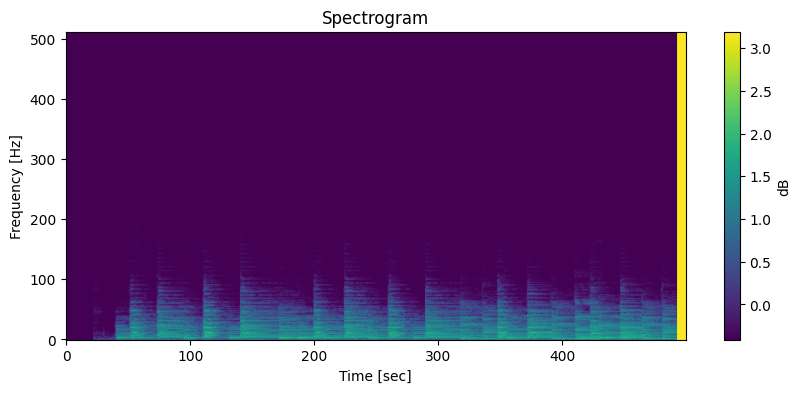

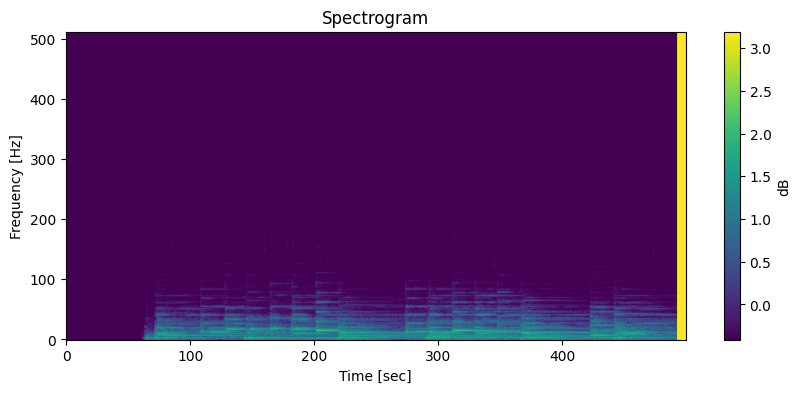

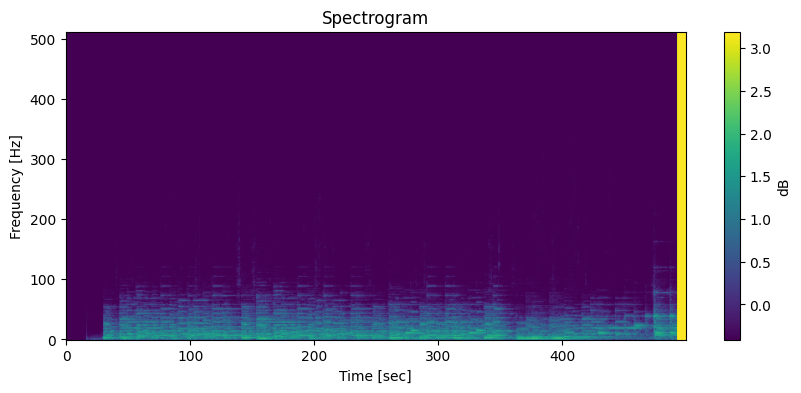

In [ ]:

for x in range(3):
    random_index = np.random.choice(len(sxx_ls))
    Sxx = sxx_norm_tf[random_index]
    #Sxx = Sxx*sxx_ls_std + sxx_ls_mean
    plt.figure(figsize=(10, 4))
    plt.imshow(Sxx, aspect='auto', origin='lower')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title("Spectrogram")
    plt.colorbar(label='dB')
    plt.show()
    # sd.play(an, sr)
    # sd.wait()

## STEP 3: Unsupervised Learning

For spectrogram as input data, i can keep it as matrix, or use spectrogram image directly. Since matrix need more calculation potentially, we use matrix normalized in last step

### Clustering algorithms: k-means, hierarchical clustering, DBSCAN

1
2
3
4
5
6
7
8
9
10
11
12
13
14


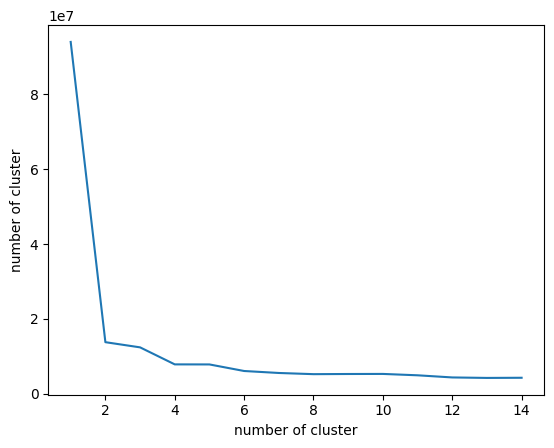

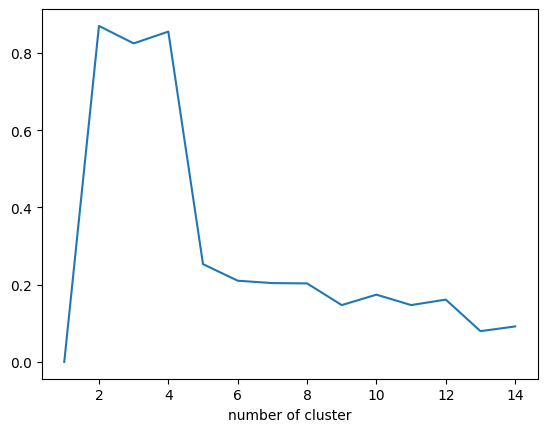

In [ ]:
#k-means (base on pixel centriod)
sxx_norm_tf
ls_score = []
ls = []
x = sxx_norm_tf.reshape(len(sxx_norm_tf), -1)
for i in range(1,15):
    print(i)
    kmeans=KMeans(n_clusters=i, init='k-means++')
    cb = kmeans.fit_predict(x)
    #kmeans.fit(df_y)
    #print(cb)
    if len(set(cb)) > 1: 
        score = silhouette_score(x, cb)
        #print(score)
        ls_score.append(score)
    else:ls_score.append(0)
    ls.append(kmeans.inertia_)

plt.plot(range(1,15), ls)
plt.xlabel("number of cluster")
plt.ylabel("number of cluster")
plt.show()
plt.plot(range(1,15), ls_score)
plt.xlabel("number of cluster")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


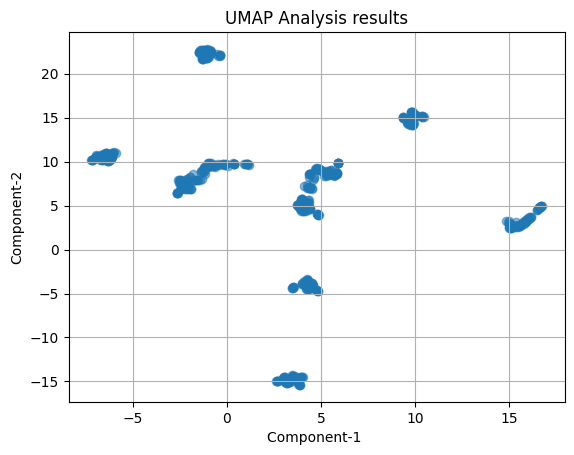

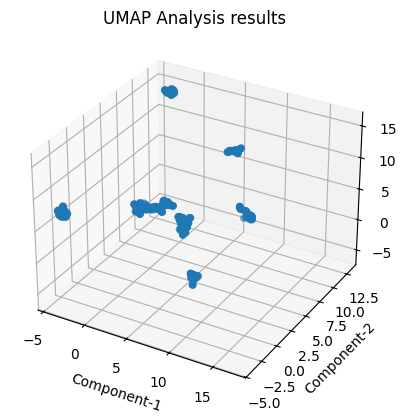

In [ ]:
#UMAP
import umap
df_y = []
umap_1 = umap.UMAP(n_components=2)
X_umap = umap_1.fit_transform(x)
plot_2D(X_umap,df_y, "UMAP")
umap_1 = umap.UMAP(n_components=3)
X_umap = umap_1.fit_transform(x)
plot_3D(X_umap,df_y, "UMAP")


label:  3


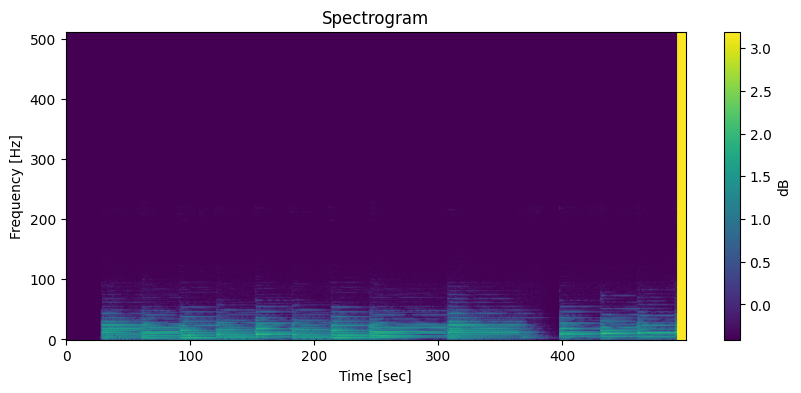

label:  3


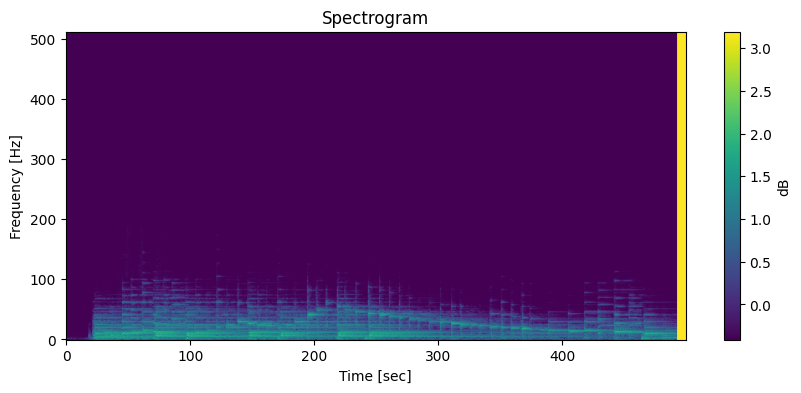

label:  3


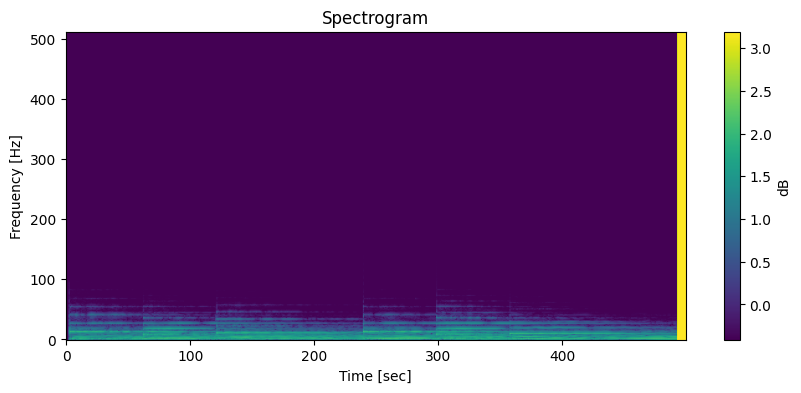

label:  2


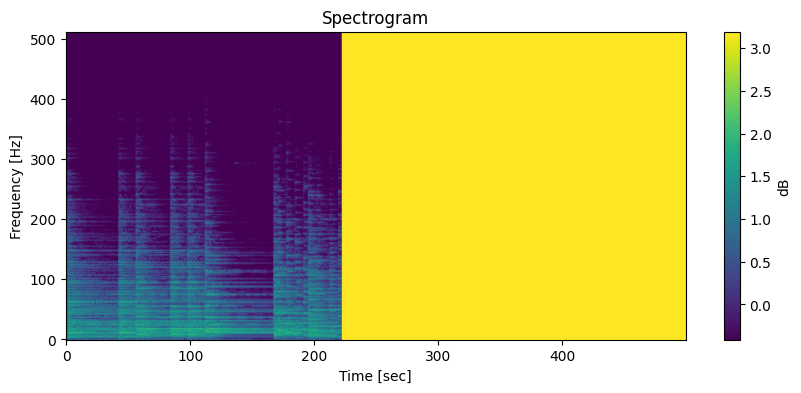

label:  3


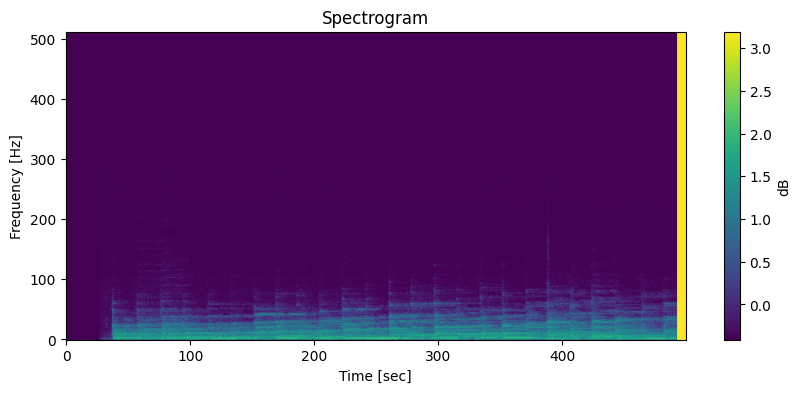

In [ ]:
#k-mean optimal
#Through inertia and silhouette-score, we can see cluster of 4 is best
kmeans=KMeans(n_clusters=4, init='k-means++')
cb = kmeans.fit_predict(x)
random_index = -1
for x in range(5):
    random_index = np.random.choice(len(sxx_ls))
    print("label: ", cb[random_index])
    Sxx = sxx_norm_tf[random_index]
    #Sxx = Sxx*sxx_ls_std + sxx_ls_mean
    plt.figure(figsize=(10, 4))
    plt.imshow(Sxx, aspect='auto', origin='lower')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title("Spectrogram")
    plt.colorbar(label='dB')
    plt.show()

### Dimensionality Reduction

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


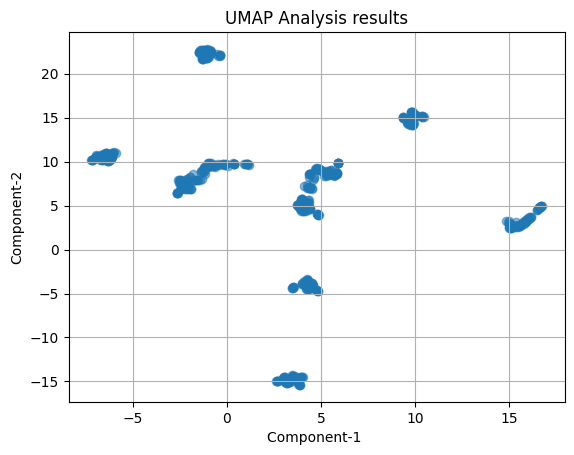

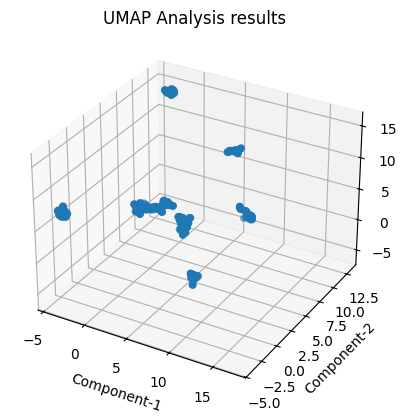

In [ ]:
#UMAP
import umap
df_y = []
umap_1 = umap.UMAP(n_components=2)
X_umap = umap_1.fit_transform(x)
plot_2D(X_umap,df_y, "UMAP")
umap_1 = umap.UMAP(n_components=3)
X_umap = umap_1.fit_transform(x)
plot_3D(X_umap,df_y, "UMAP")


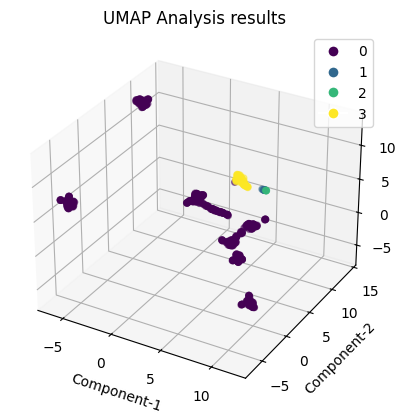

In [ ]:
#
kmeans=KMeans(n_clusters=4, init='k-means++')
cb = kmeans.fit_predict(x)
X_umap = umap.UMAP(n_components=3).fit_transform(x)
def plot_3D(X, color_vector, method):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2],c = color_vector, alpha=0.5)
    ax.set(xlabel='Component-1', ylabel='Component-2', zlabel='Component-3',
           title= f'{method} Analysis results')
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                   markerfacecolor=scatter.cmap(scatter.norm(label)),
                                   markersize=8, label=str(label)) for label in np.unique(color_vector)]
    ax.legend(handles=legend_elements)
    plt.show()
plot_3D(X_umap,cb, "UMAP")

## STEP 4: Dataset Preparation

Bsically same as sword part